In [1]:
# import the Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
rd = pd.read_csv("Recruitment_Data.csv")
rd.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
# Check the shape
rd.shape

(446, 4)

---
##### This data set has 446 rows and 4 columns

---

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


---
##### In this dataset two columns are intiger type, one is float type and one is categorical datatype

---

In [5]:
# Check if there is any null values in the dataset
rd.isnull().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

---
##### Here we see that the recruiting_source column has 205 null values

---

In [6]:
#lets check the percentage of null values
rd.isnull().mean()*100

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

---
##### Here We see that recruiting_source has 46% of values in it. we fill the null values with "No Source".

---

In [7]:
# fill the null values
rd['recruiting_source'].fillna('No Source', inplace=True)

In [8]:
# check the dataset once more
rd.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,No Source
2,1,2,0.497530,Campus
3,0,2,2.513958,No Source
4,0,3,1.424789,Applied Online


In [9]:
# check description of the numerical column of the datasets
rd['sales_quota_pct'].describe()

count    446.000000
mean       1.082607
std        0.710042
min       -0.710827
25%        0.584444
50%        1.070143
75%        1.532488
max        3.666740
Name: sales_quota_pct, dtype: float64

In [10]:
# check the value counts of  attririon
rd['attrition'].value_counts()

attrition
0    351
1     95
Name: count, dtype: int64

In [11]:
# check the value counts of performance rating
rd['performance_rating'].value_counts()

performance_rating
3    263
2    106
4     67
1      7
5      3
Name: count, dtype: int64

In [12]:
# check the value counts of recruiting_source
rd['recruiting_source'].value_counts()

recruiting_source
No Source         205
Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: count, dtype: int64

In [13]:
# lets create new column for better understanding
# here we create a new column named 'attrition_new' and  the comdition is if attrition is 1 then employee left the company else employee is present
rd['attrition_new'] = rd['attrition'].apply(lambda x: 'left' if x == 1 else 'present')

In [14]:
# Create a new column 'performance_rating_new' with descriptive labels for 'performance_rating'
# 1 -> 'very bad', 2 -> 'bad', 3 -> 'good', 4 -> 'very good', 5 -> 'excellent'
rd['performance_rating_new'] = rd['performance_rating'].map({1: 'very bad', 2: 'bad', 3: 'good', 4: 'very good', 5: 'excellent'})

In [15]:
# explore the dataset after new two columns
rd.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source,attrition_new,performance_rating_new
0,1,3,1.088190,Applied Online,left,good
1,0,3,2.394173,No Source,present,good
2,1,2,0.497530,Campus,left,bad
3,0,2,2.513958,No Source,present,bad
4,0,3,1.424789,Applied Online,present,good


In [43]:
# Group by 'recruiting_source' and calculate the mean of 'sales_quota_pct'
average_sales_by_source = rd.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print the result
print("Average Sales Quota Percentage by Recruiting Source:")
print(average_sales_by_source)

Average Sales Quota Percentage by Recruiting Source:
recruiting_source
Applied Online    1.058590
Campus            0.908035
No Source         1.168109
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64


In [44]:
# Group by 'recruiting_source' and calculate the mean of 'attrition'
average_attrition_by_source = rd.groupby('recruiting_source')['attrition'].mean()

# Print the result
print("Average Attrition Number by Recruiting Source:")
print(average_attrition_by_source)

Average Attrition Number by Recruiting Source:
recruiting_source
Applied Online    0.246154
Campus            0.285714
No Source         0.131707
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64


# Univariate Analysis

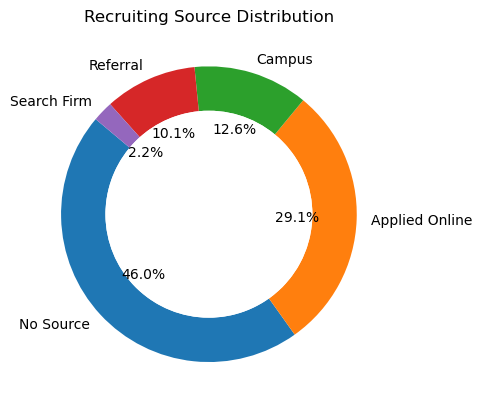

In [16]:
# Create a doughnut plot for recruititng_source

# Count the occurrences of each recruiting source
source_counts = rd['recruiting_source'].value_counts()

plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Add a circle at the center to turn the pie into a doughnut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title and show plot
plt.title('Recruiting Source Distribution')
plt.show()

##### From the graph, we see that the source of most employees is unknown. Except for the "No Source," we see that the maximum number of employees are recruited through online applications.

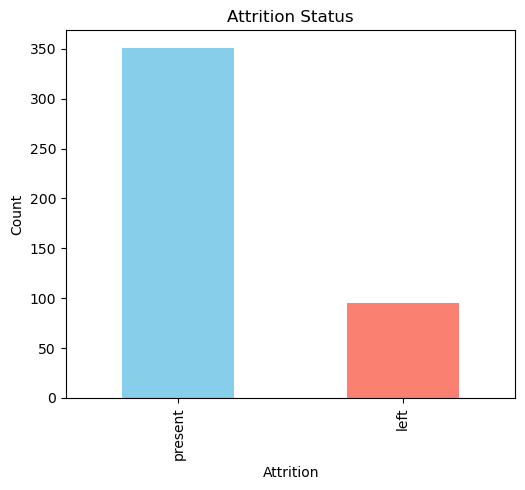

In [17]:
# Plot for attrition_new column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
rd['attrition_new'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### most of the employees are working in the company still now

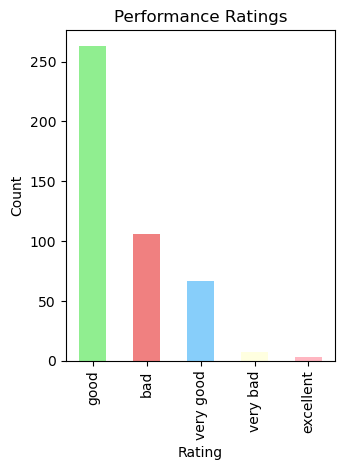

In [18]:
# Plot for performance_rating_new column
plt.subplot(1, 2, 2)
rd['performance_rating_new'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow', 'lightpink'])
plt.title('Performance Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Maximum numver of employee's performance ratings are in " Good " category. and very minimal number of employee's performance rating is excellent category. There is no employee in very bad category

In [19]:
rd['sales_quota_pct'].describe()

count    446.000000
mean       1.082607
std        0.710042
min       -0.710827
25%        0.584444
50%        1.070143
75%        1.532488
max        3.666740
Name: sales_quota_pct, dtype: float64

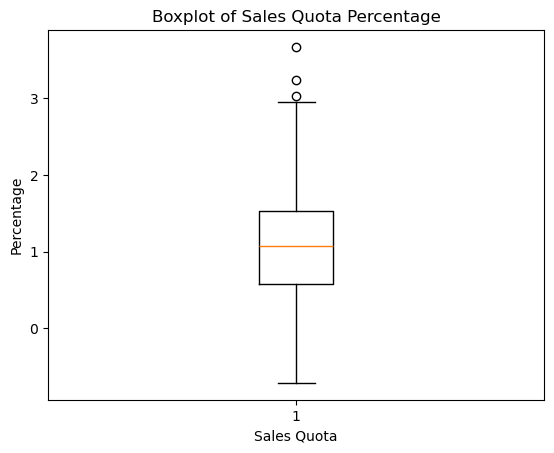

In [20]:

# Boxplot for sales_quota_pct
plt.boxplot(rd['sales_quota_pct'])
plt.title('Boxplot of Sales Quota Percentage')
plt.xlabel('Sales Quota')
plt.ylabel('Percentage')
plt.show()


##### Here we see some outliers inthe graph

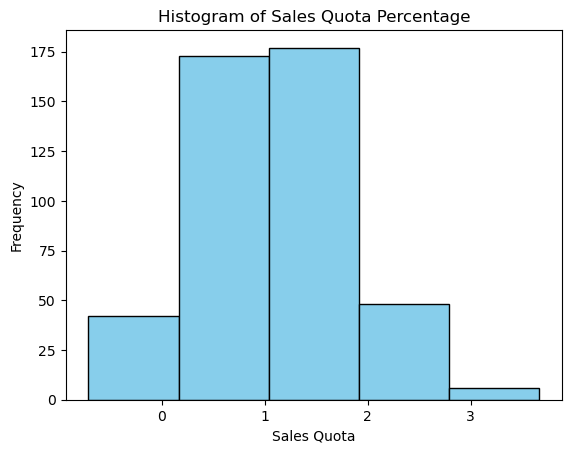

In [21]:


# Histogram for sales_quota_pct with borders
plt.hist(rd['sales_quota_pct'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales Quota Percentage')
plt.xlabel('Sales Quota')
plt.ylabel('Frequency')
plt.show()



##### we see that max number of percentge sales Quota is under the 1 and 2

In [22]:
# Calculate summary statistics for the sales_quota_pct column
summary = rd['sales_quota_pct'].describe()

# Define a function to categorize sales_quota_pct values
def categorize_sales_quota(value):
    if value < summary['25%']:
        return 'low'
    elif value < summary['50%']:
        return 'medium'
    elif value < summary['75%']:
        return 'high'
    else:
        return 'very high'

# Apply the function to create the new column
rd['sales_quota_category'] = rd['sales_quota_pct'].apply(categorize_sales_quota)


In [23]:
# check the data set
rd.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source,attrition_new,performance_rating_new,sales_quota_category
0,1,3,1.088190,Applied Online,left,good,high
1,0,3,2.394173,No Source,present,good,very high
2,1,2,0.497530,Campus,left,bad,low
3,0,2,2.513958,No Source,present,bad,very high
4,0,3,1.424789,Applied Online,present,good,high


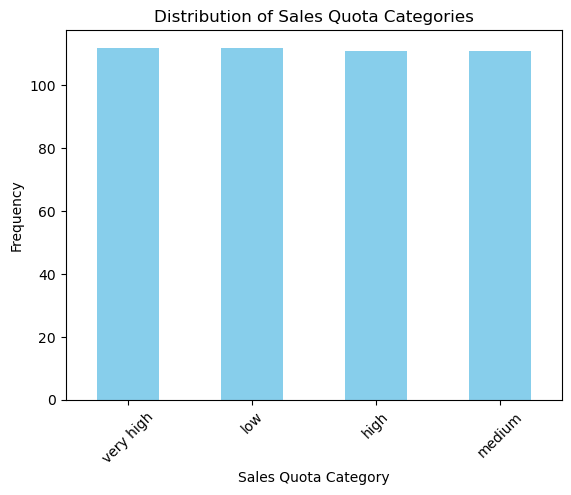

In [24]:
# Count the occurrences of each category
category_counts = rd['sales_quota_category'].value_counts()

# Plot the bar plot
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales Quota Categories')
plt.xlabel('Sales Quota Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

---
##### Here we see that the distribution of the categories is equally distributed
---

# BI-VARIATE ANALYSIS

In [37]:
# Group by Recruiting Source and Attrition New
grouped_recruiting_attrition = rd.groupby(['recruiting_source', 'attrition_new']).size().unstack(fill_value=0)
print("Recruiting Source vs. Attrition New:")
print(grouped_recruiting_attrition)

Recruiting Source vs. Attrition New:
attrition_new      left  present
recruiting_source               
Applied Online       32       98
Campus               16       40
No Source            27      178
Referral             15       30
Search Firm           5        5


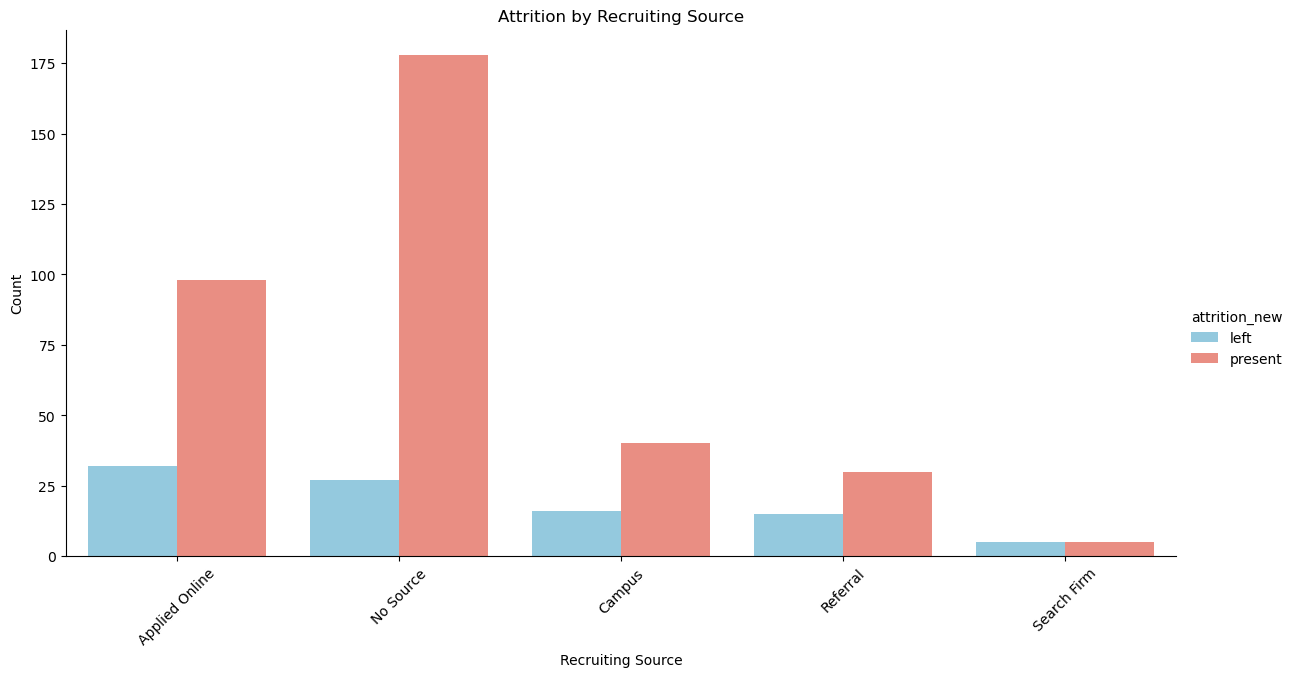

In [25]:
# Create a categorical plot using catplot
sns.catplot(data=rd, x='recruiting_source', hue='attrition_new', kind='count', palette=['skyblue', 'salmon'], height=6, aspect=2)
plt.title('Attrition by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

-
---

We see from the graph that most of the employees who applied online and those whose application source is unknown are still present in the company. The number of present employees is significantly higher than the number of employees who have left.

---

In [39]:

# Group by Performance Rating and Attrition New
grouped_performance_attrition = rd.groupby(['performance_rating_new', 'attrition_new']).size().unstack(fill_value=0)
print("\nPerformance Rating vs. Attrition New:")
print(grouped_performance_attrition)


Performance Rating vs. Attrition New:
attrition_new           left  present
performance_rating_new               
bad                       21       85
excellent                  0        3
good                      57      206
very bad                   3        4
very good                 14       53


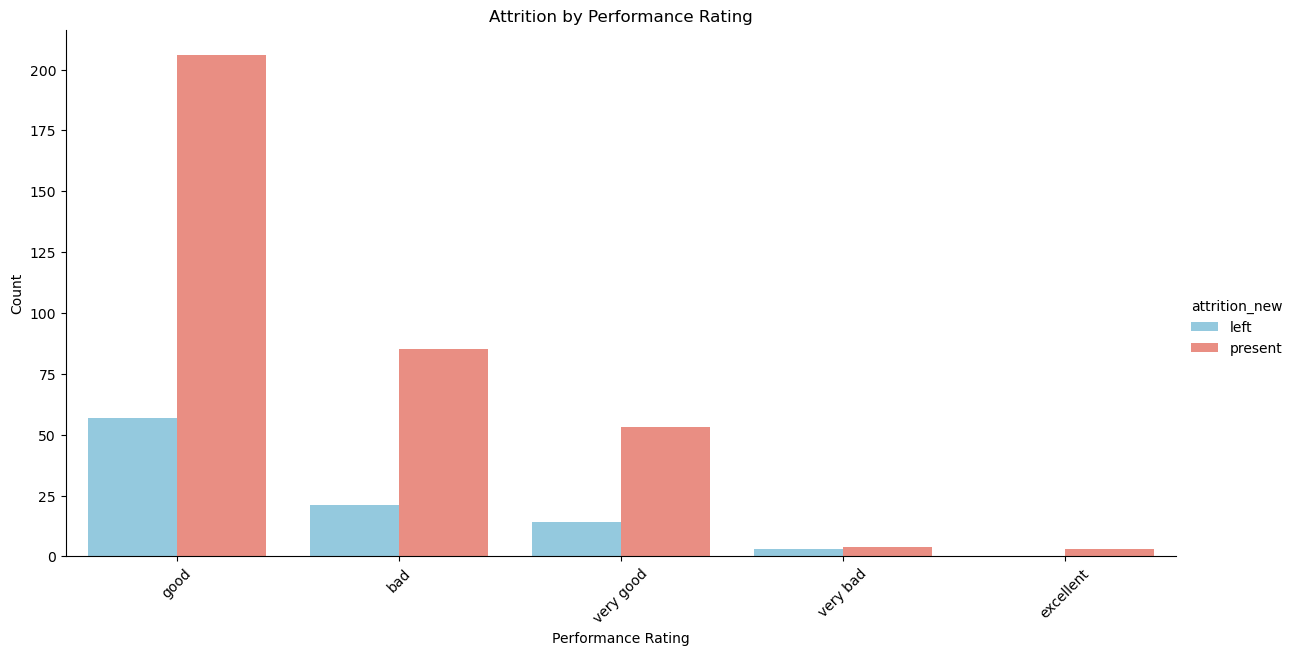

In [26]:


# Create a categorical plot using catplot
sns.catplot(data=rd, x='performance_rating_new', hue='attrition_new', kind='count', palette=['skyblue', 'salmon'], height=6, aspect=2)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


---
##### The present and left persentage of people is high for  "good" category section 
---

In [40]:

# Group by Sales Quota Category and Attrition New
grouped_sales_quota_attrition = rd.groupby(['sales_quota_category', 'attrition_new']).size().unstack(fill_value=0)
print("\nSales Quota Category vs. Attrition New:")
print(grouped_sales_quota_attrition)


Sales Quota Category vs. Attrition New:
attrition_new         left  present
sales_quota_category               
high                    26       85
low                     28       84
medium                  19       92
very high               22       90


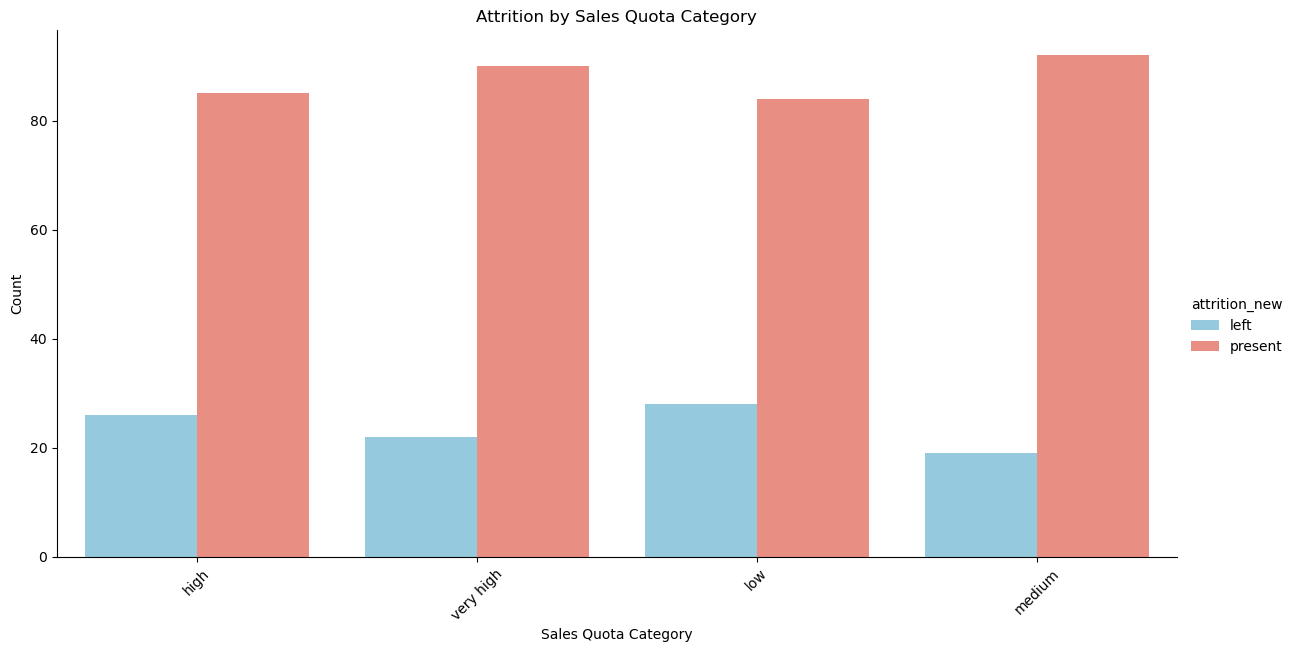

In [27]:
# Create a categorical plot using catplot
sns.catplot(data=rd, x='sales_quota_category', hue='attrition_new', kind='count', palette=['skyblue', 'salmon'], height=6, aspect=2)
plt.title('Attrition by Sales Quota Category')
plt.xlabel('Sales Quota Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

---
##### The number of present people is high for 'very high' and 'medium' category and the number of people who left is high for 'high' and 'low' sales_quota category
---

C:\Users\SAURADIP PRADHAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


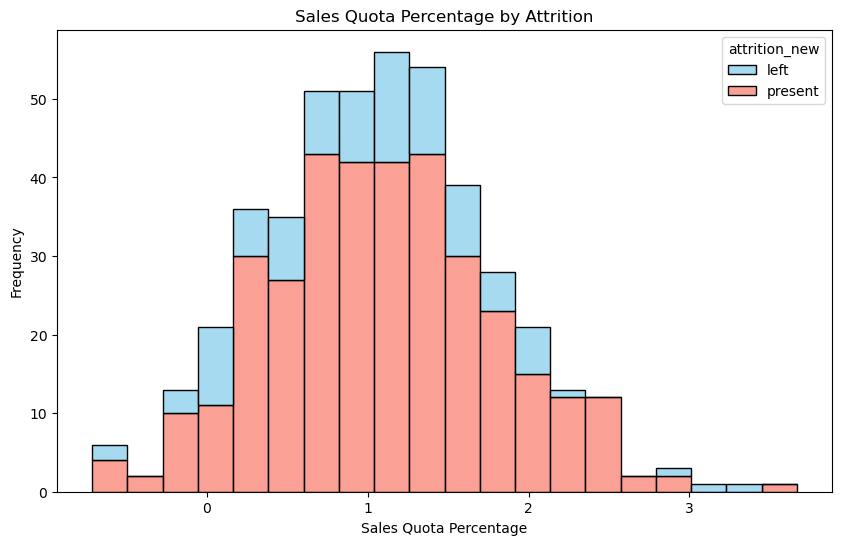

In [28]:
# Create a histogram plot for sales_quota_pct by attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=rd, x='sales_quota_pct', hue='attrition_new', multiple='stack', palette=['skyblue', 'salmon'], bins=20)
plt.title('Sales Quota Percentage by Attrition')
plt.xlabel('Sales Quota Percentage')
plt.ylabel('Frequency')
plt.show()


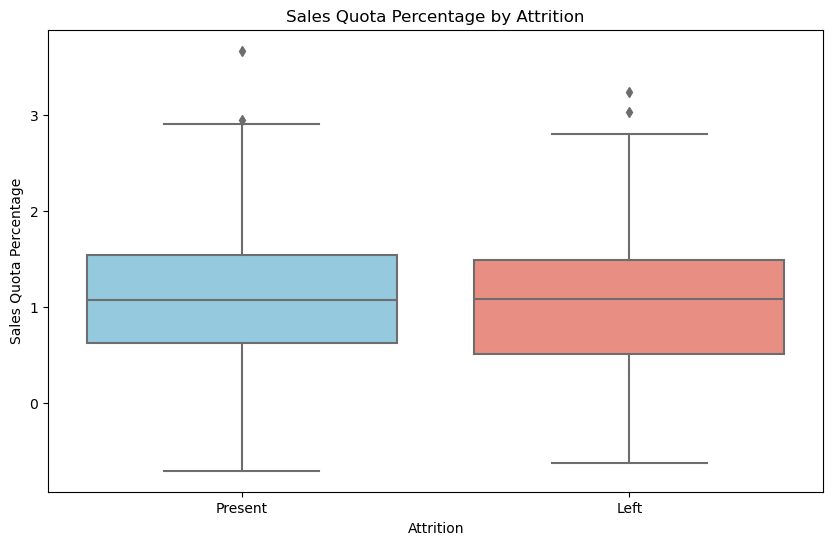

In [29]:
# Create a boxplot for sales_quota_pct by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=rd, x='attrition', y='sales_quota_pct', palette=['skyblue', 'salmon'])
plt.title('Sales Quota Percentage by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Sales Quota Percentage')
plt.xticks(ticks=[0, 1], labels=['Present', 'Left'])  # Set custom x-axis labels
plt.show()

---
##### From the graph we see that 'Present' and 'Left' Category median point is almost same for sales Quota Percentages.
---

In [30]:
# Group by Recruiting Source and Performance Rating
grouped_recruiting_performance = rd.groupby(['recruiting_source', 'performance_rating_new']).size().unstack(fill_value=0)
print("Recruiting Source vs. Performance Rating:")
print(grouped_recruiting_performance)

Recruiting Source vs. Performance Rating:
performance_rating_new  bad  excellent  good  very bad  very good
recruiting_source                                                
Applied Online           30          1    77         1         21
Campus                   13          1    32         1          9
No Source                50          1   121         3         30
Referral                 10          0    26         2          7
Search Firm               3          0     7         0          0


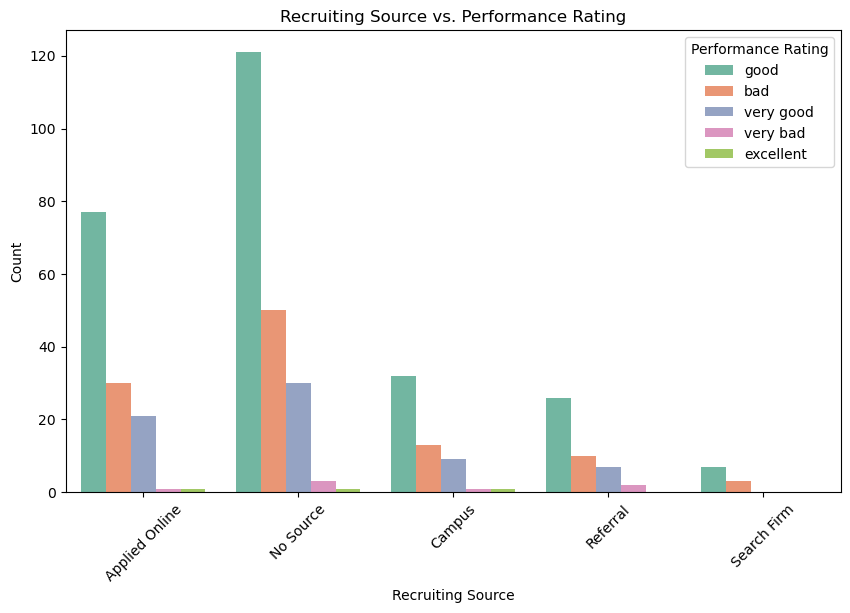

In [41]:
# Plot 1: Recruiting Source vs. Performance Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=rd, x='recruiting_source', hue='performance_rating_new', palette='Set2')
plt.title('Recruiting Source vs. Performance Rating')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Performance Rating')
plt.show()


---

- The **'no source'** category contains:
  - A high number of **good** and **very good** employees.
  - A high number of **bad** employees performance-wise.

- The **'applied online', 'no source', 'campus', and 'referral'** groups contain:
  - A significant number of **very bad** performance employees.

- Interestingly, **excellent** performance employees are coming from:
  - **'applied online', 'no source', and 'campus'** groups.

---

In [34]:
# Group by Recruiting Source and sales_quota_category
grouped_recruiting_performance = rd.groupby(['recruiting_source', 'sales_quota_category']).size().unstack(fill_value=0)
print("Recruiting Source vs. sales_quota_category")
print(grouped_recruiting_performance)

Recruiting Source vs. sales_quota_category
sales_quota_category  high  low  medium  very high
recruiting_source                                 
Applied Online          33   30      36         31
Campus                  12   23      10         11
No Source               53   44      47         61
Referral                 9   12      17          7
Search Firm              4    3       1          2


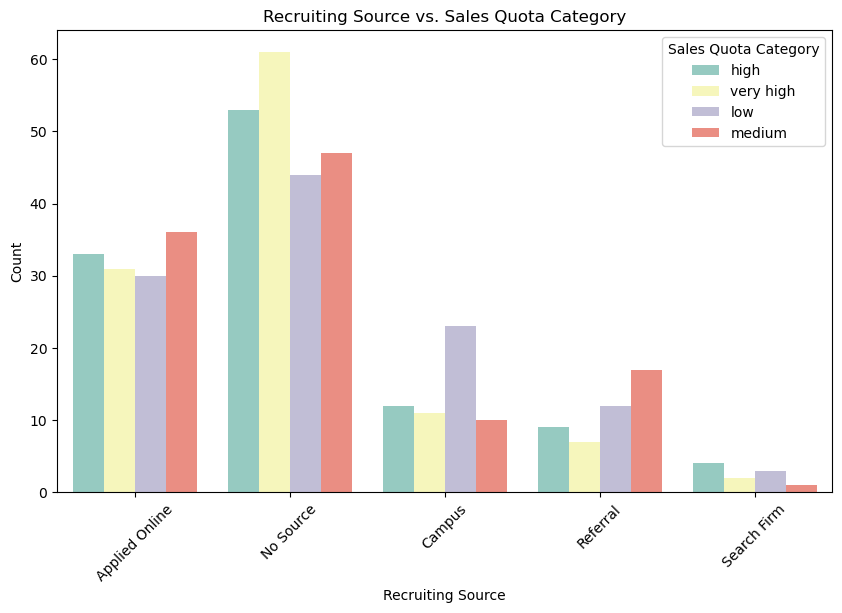

In [32]:
# Plot 2: Recruiting Source vs. Sales Quota Category
plt.figure(figsize=(10, 6))
sns.countplot(data=rd, x='recruiting_source', hue='sales_quota_category', palette='Set3')
plt.title('Recruiting Source vs. Sales Quota Category')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sales Quota Category')
plt.show()

Here is the information properly formatted for a markdown cell:

---

- For the **applied online** group:
  - The **medium** sales quota category is the highest.
  - The **high** sales quota category is the second highest.

- For the **no source** group:
  - The **very high** sales quota category is the maximum.
  - The **high** sales quota category follows.

- For the **campus** category:
  - The number of **low** sales quota category is very high.
  - The **high** sales quota category is in second position.

- For the **referral** group:
  - The **medium** sales quota category is the highest.
  - The number of **very high** sales quota category is low.

- For **search firms**:
  - The number of **high** sales quota category is the maximum.

---

In [36]:
# Group by performance_rating_new and sales_quota_category
grouped_performance_rating_new = rd.groupby(['performance_rating_new', 'sales_quota_category']).size().unstack(fill_value=0)
print("performance_rating_new vs. sales_quota_category")
print(grouped_performance_rating_new)

performance_rating_new vs. sales_quota_category
sales_quota_category    high  low  medium  very high
performance_rating_new                              
bad                       24   27      27         28
excellent                  2    0       0          1
good                      65   70      66         62
very bad                   1    0       1          5
very good                 19   15      17         16


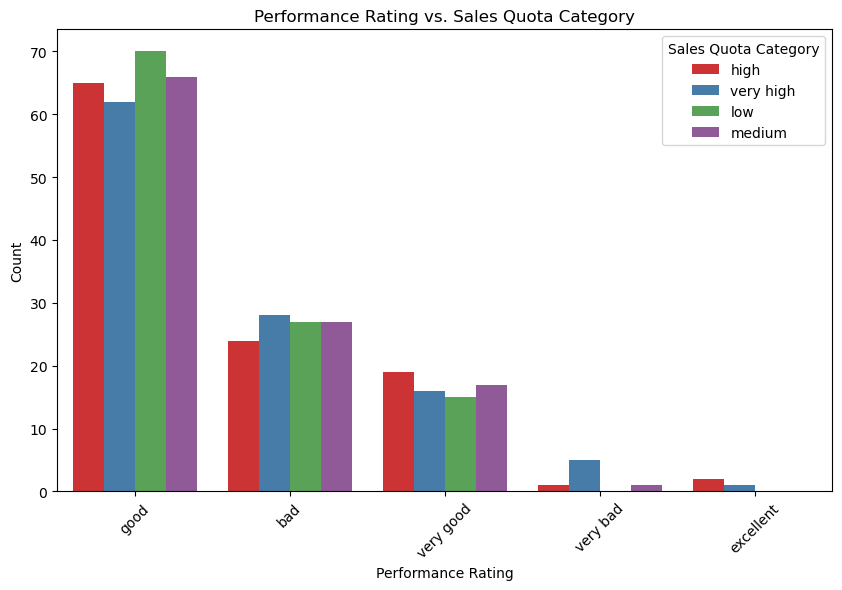

In [33]:
# Plot 3: Performance Rating vs. Sales Quota Category
plt.figure(figsize=(10, 6))
sns.countplot(data=rd, x='performance_rating_new', hue='sales_quota_category', palette='Set1')
plt.title('Performance Rating vs. Sales Quota Category')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sales Quota Category')
plt.show()


---

- For the **good** performance category:
  - The number of **low** sales quota category is high.
  - The **medium** sales quota category is the second highest.
  - The number of **very high** sales quota category is the lowest.

- For the **bad** performance category:
  - The number of **very high** sales quota category is high.

- For the **very good** performance category:
  - The **high** sales quota category is the highest.

- For the **very bad** performance category:
  - The **very high** sales quota category group is the maximum.

- For the **excellent** performance category:
  - The number of **high** sales quota category is the maximum.

- Overall, the maximum number of employees in all categories is distributed as follows:
  - **Good** category has the highest number.
  - Followed by the **bad** category.
  - Then the **very good** category.
  - Next, the **very bad** category.
  - Finally, the **excellent** category.

---

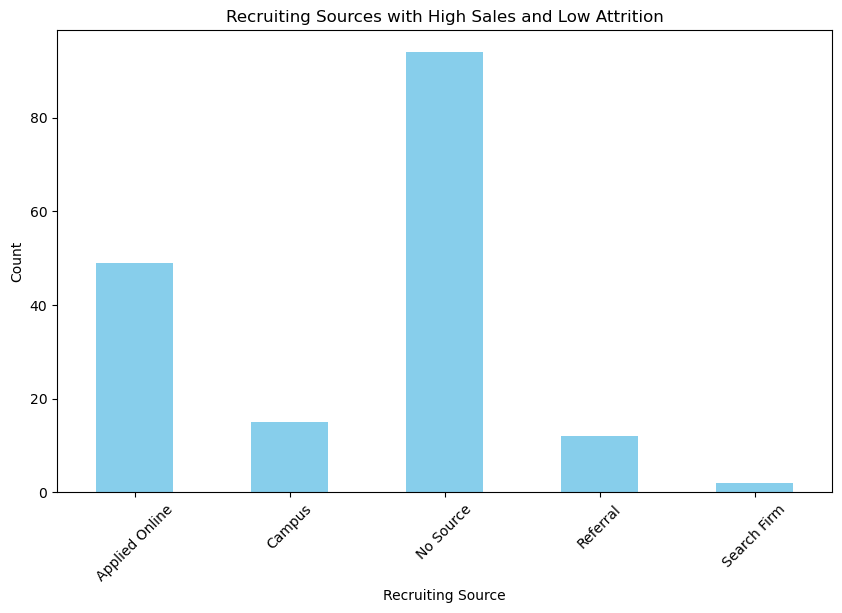

In [45]:
# Define the condition for high sales numbers and low attrition numbers
high_sales_low_attrition = rd[(rd['sales_quota_pct'] > rd['sales_quota_pct'].mean()) & (rd['attrition'] == 0)]

# Group by 'recruiting_source' and calculate the count
grouped_sources = high_sales_low_attrition.groupby('recruiting_source').size()

# Plot the bar plot
plt.figure(figsize=(10, 6))
grouped_sources.plot(kind='bar', color='skyblue')
plt.title('Recruiting Sources with High Sales and Low Attrition')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


---

From the above graph, we can see that the **unknown source** has the highest sales value and the lowest attrition rate. Following that, the **applied online** source is the second, exhibiting similar conditions.

---